In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras.datasets import mnist

In [3]:
tf.version.VERSION

'2.1.0'

In [5]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [14]:
label = train_labels[1249].argmax(axis=0)
print(train_labels[1249])
print(label)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


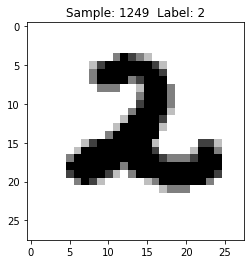

In [11]:

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1249)

In [0]:
model = keras.Sequential()
model.add(keras.Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784, )),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=5,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 6s - loss: 0.2425 - accuracy: 0.9289 - val_loss: 0.1172 - val_accuracy: 0.9646
Epoch 2/5
60000/60000 - 5s - loss: 0.0991 - accuracy: 0.9707 - val_loss: 0.0982 - val_accuracy: 0.9705
Epoch 3/5
60000/60000 - 5s - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0785 - val_accuracy: 0.9767
Epoch 4/5
60000/60000 - 5s - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 5/5
60000/60000 - 5s - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0689 - val_accuracy: 0.9805


In [22]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06888663696883013
Test accuracy: 0.9805


In [0]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_labels = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_labels != label):
        plt.title('Prediction: %d Label: %d' % (predicted_labels, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

In [116]:
error_label = list()
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_label = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    
    if (predicted_label != label):
      error_label.append(label)
print(len(error_label))

19


Add Dropout Layer

In [0]:
model_dropout = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(784,)),
                                  keras.layers.Dense(512,activation='relu'),
                                  keras.layers.Dropout(rate=0.2),
                                  keras.layers.Dense(256,activation='relu'),
                                  keras.layers.Dropout(rate=0.5),
                                  keras.layers.Dense(10,activation='softmax')
                                  
])

In [0]:
model_dropout.compile(loss='categorical_crossentropy',
    optimizer= keras.optimizers.Adam(),
    metrics=['accuracy'])

In [56]:
hist_dropout = model_dropout.fit(train_images, train_labels,
           batch_size=100,
           epochs=10,
           verbose=2,
           validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 6s - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 2/10
60000/60000 - 6s - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0666 - val_accuracy: 0.9816
Epoch 3/10
60000/60000 - 6s - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0669 - val_accuracy: 0.9803
Epoch 4/10
60000/60000 - 6s - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 5/10
60000/60000 - 6s - loss: 0.0338 - accuracy: 0.9886 - val_loss: 0.0692 - val_accuracy: 0.9824
Epoch 6/10
60000/60000 - 6s - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0659 - val_accuracy: 0.9814
Epoch 7/10
60000/60000 - 6s - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0785 - val_accuracy: 0.9819
Epoch 8/10
60000/60000 - 6s - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0732 - val_accuracy: 0.9825
Epoch 9/10
60000/60000 - 6s - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0715 - val_accuracy: 0.9828
Epoch 10/10
60

In [46]:
score = model_dropout.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.4155910562992096
Test accuracy: 0.9268


In [0]:
predictions = model_dropout.predict(test_images)


In [59]:
predictions.shape


(10000, 10)

In [71]:
np.argmax(predictions[1003])


5

In [72]:
test_labels[1003].argmax()


5

In [66]:
len(test_labels)

10000

In [102]:
error_label = list()
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_label = model_dropout.predict(test_image).argmax()
    label = test_labels[x].argmax()
    
    if (predicted_label != label):
      error_label.append(label)
print(len(error_label))
       

22
